<a href="https://colab.research.google.com/github/lfa-systems/Telecom_X/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [373]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [374]:
# Definino caminho do arquivo de dados
url = 'https://raw.githubusercontent.com/lfa-systems/Telecom_X/refs/heads/main/dados/TelecomX_Data.json'
# Dicionário de dados
# https://github.com/lfa-systems/Telecom_X/blob/main/dados/TelecomX_dicionario.md

In [375]:
# Converter arquivo de dados para Data Frame, para a análise e manipulação de dados.
dados = pd.read_json(url)

In [376]:
# Conhecendo os dados
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [377]:
# Conhecendo a estrutura dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformação

In [378]:
# Fazendo copia dos dados para os trabalho
df = dados.copy()

In [379]:
# Transformar colunas de dicionários para coluna com prefixo da coluna original

for nome_coluna in dados.columns:
    if isinstance(dados[nome_coluna].iloc[0], dict):
       temp_normalizado = pd.json_normalize(dados[nome_coluna])
       df = pd.concat([df, temp_normalizado.add_prefix(f'{nome_coluna}_')], axis=1).drop(nome_coluna, axis=1)

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [381]:
# Verificar valores nulos
df.isna().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [382]:
# Verificar registros duplicados
df.duplicated().sum()

np.int64(0)

In [383]:
# Conhecendo valores únicos das colunas
def ValoresUnicos(dataFrame):
  for nome_coluna in df.columns:
      print(f'{nome_coluna}\n',dataFrame[nome_coluna].unique())
ValoresUnicos(df)

customerID
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
 ['No' 'Yes' '']
customer_gender
 ['Female' 'Male']
customer_SeniorCitizen
 [0 1]
customer_Partner
 ['Yes' 'No']
customer_Dependents
 ['Yes' 'No']
customer_tenure
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService
 ['Yes' 'No']
phone_MultipleLines
 ['No' 'Yes' 'No phone service']
internet_InternetService
 ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity
 ['No' 'Yes' 'No internet service']
internet_OnlineBackup
 ['Yes' 'No' 'No internet service']
internet_DeviceProtection
 ['No' 'Yes' 'No internet service']
internet_TechSupport
 ['Yes' 'No' 'No internet service']
internet_StreamingTV
 ['Yes' 'No' 'No internet service']
internet_StreamingMovies
 ['No' 'Yes' 'No internet service']
account_Contrac

In [384]:
# Verificar colunas com valores vazio
mascara_espaco = (df.isin(['',' ']))
colunas_com_espaco_booleano = mascara_espaco.any(axis=0)
colunas_com_espaco = colunas_com_espaco_booleano[colunas_com_espaco_booleano].index.tolist()
colunas_com_espaco


['Churn', 'account_Charges.Total']

In [385]:
# Assumir Churn '' como não
df.loc[df['Churn'] == '', 'Churn'] = 'No'


In [386]:
# Assumir account_Charges.Total vazio como zero
df['account_Charges.Total'] = df['account_Charges.Total'].replace(' ', '0')


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [388]:
# Mudar tipo da coluna account_Charges.Total para números
df['account_Charges.Total'] = df['account_Charges.Total'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [389]:
# Verificar colunas com valores null
print(df.isnull().sum())

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges.Monthly      0
account_Charges.Total        0
dtype: int64


In [390]:
# verificar ID duplicadas
df['customerID'].duplicated().sum()

np.int64(0)

In [391]:
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [392]:
ValoresUnicos(df)

customerID
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
 ['No' 'Yes']
customer_gender
 ['Female' 'Male']
customer_SeniorCitizen
 [0 1]
customer_Partner
 ['Yes' 'No']
customer_Dependents
 ['Yes' 'No']
customer_tenure
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService
 ['Yes' 'No']
phone_MultipleLines
 ['No' 'Yes' 'No phone service']
internet_InternetService
 ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity
 ['No' 'Yes' 'No internet service']
internet_OnlineBackup
 ['Yes' 'No' 'No internet service']
internet_DeviceProtection
 ['No' 'Yes' 'No internet service']
internet_TechSupport
 ['Yes' 'No' 'No internet service']
internet_StreamingTV
 ['Yes' 'No' 'No internet service']
internet_StreamingMovies
 ['No' 'Yes' 'No internet service']
account_Contract
 

In [393]:
# Salvar data fame tratado
df.to_csv('TelecomX_Data.csv', index=False)

In [394]:
# Pegar colunas de dados
colunas = df.columns[2:]

In [395]:
# Conhecer tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [396]:
# Tratar coluna customer_SeniorCitizen como string 1 = sim, 0 = não
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [397]:
# Usar data frame para portugues
df_pt = df.copy()

In [398]:
# Cada dicionário mapeia os valores originais para os traduzidos.

# Opt-in to the future behavior for downcasting
pd.set_option('future.no_silent_downcasting', True)

translation_maps = {
    'Churn': {'Yes': 'Sim', 'No': 'Não'},
    'customer_gender': {'Male': 'Masculino', 'Female': 'Feminino'},
    'customer_SeniorCitizen': {'1': 'Sim', '0': 'Não'},
    'customer_Partner': {'Yes': 'Sim', 'No': 'Não'},
    'customer_Dependents': {'Yes': 'Sim', 'No': 'Não'},
    'phone_PhoneService': {'Yes': 'Sim', 'No': 'Não'},
    'phone_MultipleLines': {'No phone service': 'Sem Serviço de Telefone', 'No': 'Não', 'Yes': 'Sim'},
    'internet_InternetService': {'DSL': 'DSL', 'Fiber optic': 'Fibra Ótica', 'No': 'Sem Serviço de Internet'},
    'internet_OnlineSecurity': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'internet_OnlineBackup': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'internet_DeviceProtection': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'internet_TechSupport': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'internet_StreamingTV': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'internet_StreamingMovies': {'No internet service': 'Sem Serviço de Internet', 'No': 'Não', 'Yes': 'Sim'},
    'account_Contract': {'Month-to-month': 'Mensal', 'One year': 'Anual', 'Two year': 'Bienal'},
    'account_PaperlessBilling': {'Yes': 'Sim', 'No': 'Não'},
    'account_PaymentMethod': {
        'Electronic check': 'Cheque Eletrônico',
        'Mailed check': 'Cheque Enviado',
        'Bank transfer (automatic)': 'Transferência Bancária (Automática)',
        'Credit card (automatic)': 'Cartão de Crédito (Automático)'
    }
}

# --- Aplicar as Traduções ao DataFrame ---
# Isso altera os valores no DataFrame, então os gráficos já serão gerados com os termos em português.
for column, mapping in translation_maps.items():
    if column in df.columns: # Garante que a coluna existe no seu DataFrame
        df_pt[column] = df_pt[column].replace(mapping)

In [399]:
df_pt

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque Enviado,65.60,593.30
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Não,Sim,Mensal,Não,Cheque Enviado,59.90,542.40
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra Ótica,...,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque Eletrônico,73.90,280.85
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra Ótica,...,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque Eletrônico,98.00,1237.85
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra Ótica,...,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque Enviado,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,0,Não,Não,13,Sim,Não,DSL,...,Não,Não,Sim,Não,Não,Anual,Não,Cheque Enviado,55.15,742.90
7263,9992-RRAMN,Sim,Masculino,0,Sim,Não,22,Sim,Sim,Fibra Ótica,...,Não,Não,Não,Não,Sim,Mensal,Sim,Cheque Eletrônico,85.10,1873.70
7264,9992-UJOEL,Não,Masculino,0,Não,Não,2,Sim,Não,DSL,...,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque Enviado,50.30,92.75
7265,9993-LHIEB,Não,Masculino,0,Sim,Sim,67,Sim,Não,DSL,...,Não,Sim,Sim,Não,Sim,Bienal,Não,Cheque Enviado,67.85,4627.65


In [400]:
# Realiza a substituição dos valores
df_pt['customer_SeniorCitizen'] = df_pt['customer_SeniorCitizen'].replace({0: 'Não', 1: 'Sim'})


In [401]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [402]:
ValoresUnicos(df_pt)

customerID
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
 ['Não' 'Sim']
customer_gender
 ['Feminino' 'Masculino']
customer_SeniorCitizen
 ['Não' 'Sim']
customer_Partner
 ['Sim' 'Não']
customer_Dependents
 ['Sim' 'Não']
customer_tenure
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService
 ['Sim' 'Não']
phone_MultipleLines
 ['Não' 'Sim' 'Sem Serviço de Telefone']
internet_InternetService
 ['DSL' 'Fibra Ótica' 'Sem Serviço de Internet']
internet_OnlineSecurity
 ['Não' 'Sim' 'Sem Serviço de Internet']
internet_OnlineBackup
 ['Sim' 'Não' 'Sem Serviço de Internet']
internet_DeviceProtection
 ['Não' 'Sim' 'Sem Serviço de Internet']
internet_TechSupport
 ['Sim' 'Não' 'Sem Serviço de Internet']
internet_StreamingTV
 ['Sim' 'Não' 'Sem Serviço de Internet']
intern

#📊 Carga e análise

In [403]:
# Contando quantos cliente deixou ou não a empresa.
df_filtrado = df_pt[df['Churn'].str.lower().isin(['Sim', 'Não'])].copy()
Churn_counts = df_pt['Churn'].value_counts().reset_index()
Churn_counts.columns = ['Churn', 'Total']
Churn_counts

,Churn,Total
0,Não,5398
1,Sim,1869


In [404]:
df_pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

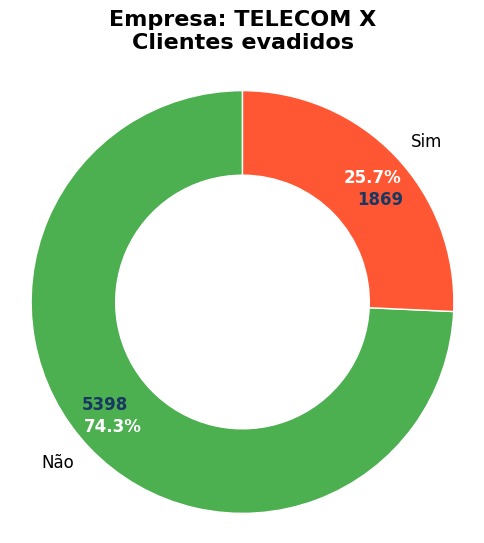

In [405]:
# Rótulos para as fatias (coluna 'Churn' do Churn_counts: 'Sim', 'Não')
labels = Churn_counts['Churn'].tolist()
# Valores para as fatias (coluna 'Total' do Churn_counts: as contagens)
sizes = Churn_counts['Total'].tolist()

# Cores para as fatias (ajustadas para 'Sim' e 'Não')
# É importante que a ordem das cores corresponda à ordem dos rótulos em 'labels'
# Se 'Sim' for o primeiro na lista de labels, a cor do 'Sim' deve ser a primeira
# Para garantir, podemos ordenar ou mapear:
color_map = {'Sim': '#FF5733', 'Não': '#4CAF50'}
colors = [color_map[label] for label in labels]

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(6, 6))

# Criando o gráfico de pizza, que será transformado em rosca
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%', # Formato para exibir porcentagens (1 casa decimal)
    startangle=90,     # Começa a primeira fatia do topo
    pctdistance=0.85,  # Posição do texto da porcentagem (mais para dentro do círculo)
    wedgeprops=dict(width=0.4, edgecolor='w') # Define a largura da "rosquinha" e a borda branca
)

# Desenha um círculo branco no centro para criar o efeito de rosca
centre_circle = plt.Circle((0,0), 0.30, fc='white')
fig.gca().add_artist(centre_circle)

# Ajusta o posicionamento para garantir que o círculo seja perfeito
ax.axis('equal')

# Ajusta o tamanho da fonte das porcentagens
plt.setp(autotexts, size=12, weight="bold", color='white') # Texto das porcentagens
# Ajusta o tamanho da fonte dos rótulos
plt.setp(texts, size=12, color='black') # Texto dos rótulos ('Sim', 'Não')

# Título do Gráfico
ax.set_title('Empresa: TELECOM X\nClientes evadidos', y=1.03, fontsize=16, fontweight='bold', loc='center')

# Remover as bordas da caixa do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionar os valores absolutos dentro ou perto das fatias
for i, (label, size) in enumerate(zip(labels, sizes)):
    angle = (wedges[i].theta2 + wedges[i].theta1) / 2
    x = np.cos(np.deg2rad(angle)) * 0.90 # Ajuste o raio para a posição X
    y = np.sin(np.deg2rad(angle)) * 0.70 # Ajuste o raio para a posição Y
    # Adicionar o texto com o valor absoluto
    ax.text(x, y, str(size), ha='center', va='center', fontsize=12, color='#183861', fontweight='bold')

plt.show()


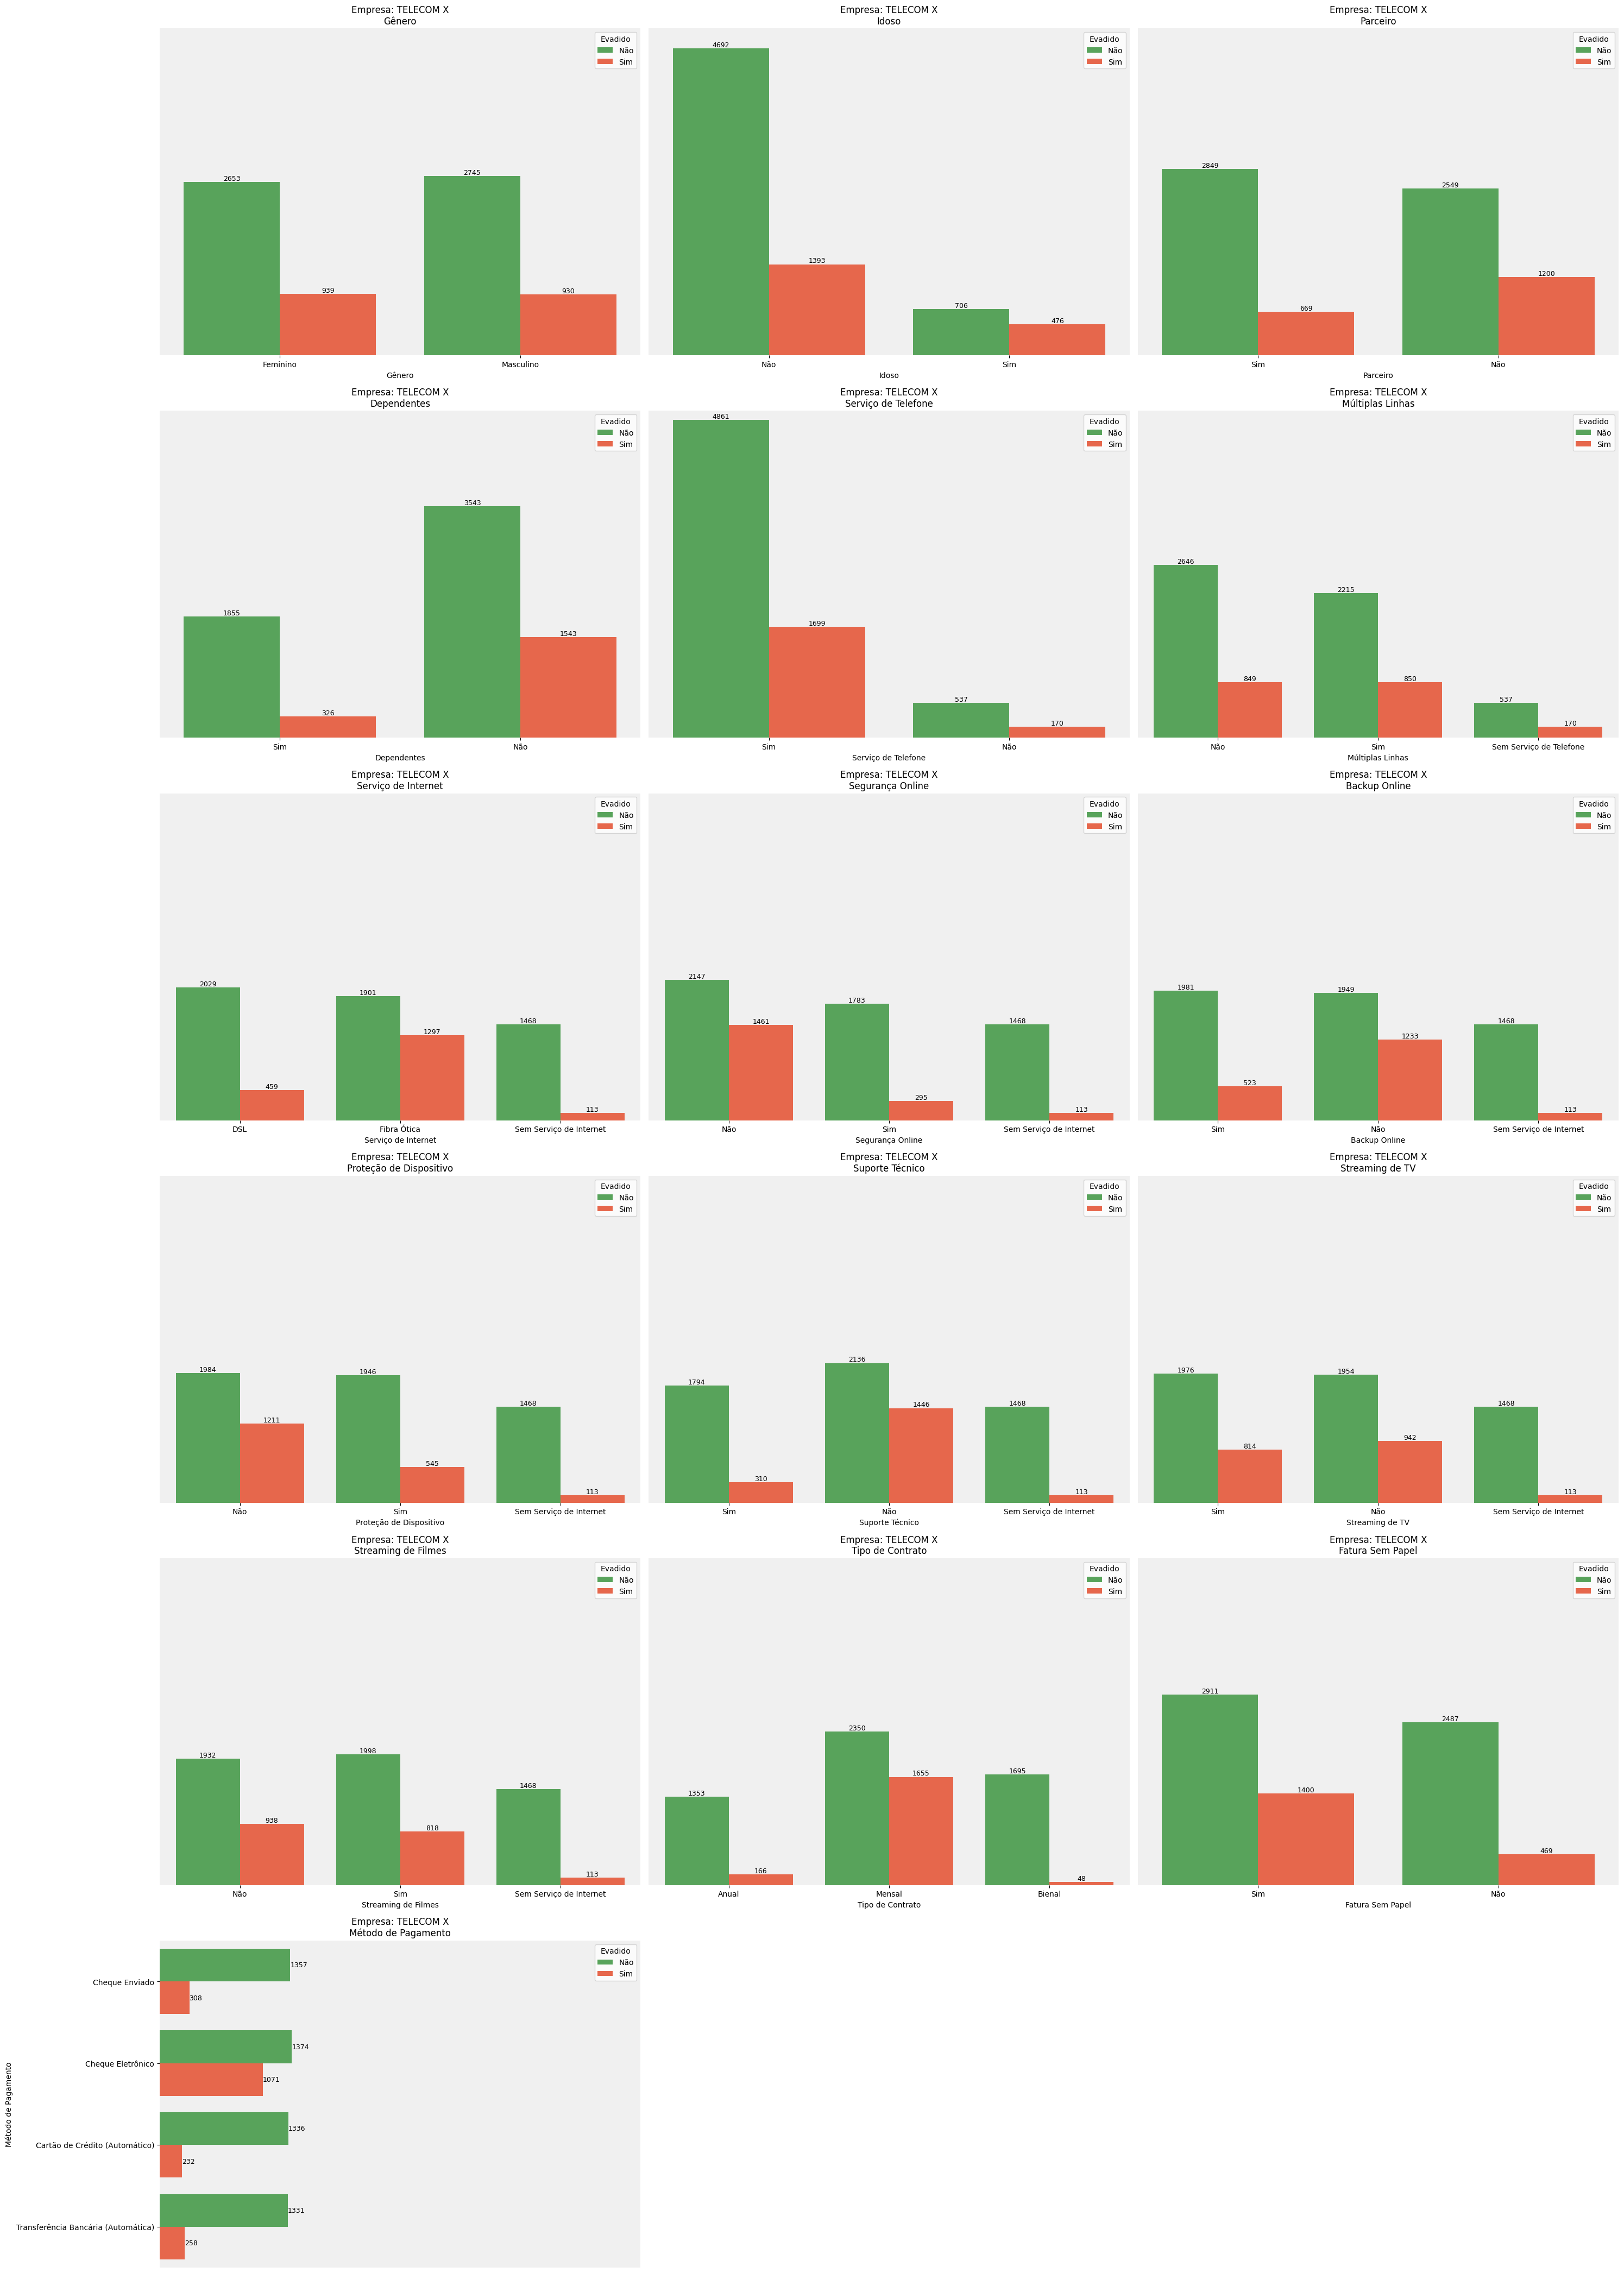

In [406]:
# Colunas para gerar gráficos
column_titles = {
    'customer_gender': 'Gênero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Parceiro',
    'customer_Dependents': 'Dependentes',
    'phone_PhoneService': 'Serviço de Telefone',
    'phone_MultipleLines': 'Múltiplas Linhas',
    'internet_InternetService': 'Serviço de Internet',
    'internet_OnlineSecurity': 'Segurança Online',
    'internet_OnlineBackup': 'Backup Online',
    'internet_DeviceProtection': 'Proteção de Dispositivo',
    'internet_TechSupport': 'Suporte Técnico',
    'internet_StreamingTV': 'Streaming de TV',
    'internet_StreamingMovies': 'Streaming de Filmes',
    'account_Contract': 'Tipo de Contrato',
    'account_PaperlessBilling': 'Fatura Sem Papel',
    'account_PaymentMethod': 'Método de Pagamento'
}

# Mostrar graficos ordenado por column_titles
categorical_cols = [col for col in column_titles.keys() if col in df_pt.columns]

# Definir o número de linhas e colunas para os subplots
n_rows = 7
n_cols = 3

# Paleta de cores para os histogramas (vermelho e amarelo)
histogram_palette = ['#4CAF50', '#FF5733'] #['#FF0000', '#FFD700']

paleta_cores = ['#4CAF50', '#FF5733']

# Padronizar valor maximo das barras
max_value = 5000

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 7))
axes = axes.flatten() # facilitar a iteração axes[i] em vez de axes[0, 0]

for i, col in enumerate(categorical_cols):
    if i < len(axes): # Garante que não excedemos o número de subplots
        ax = axes[i] # Atribui o eixo atual para facilitar a leitura

        # Definir a cor de fundo do subplot
        ax.set_facecolor('#f0f0f0') # Cinza claro

        # Obter o título personalizado do dicionário
        title = column_titles.get(col, f'Churn por {col}')
        ax.set_title('Empresa: TELECOM X\n'+title, fontsize=12)

        # Meio de pagamento em barras horizontal devido suas descrições
        if col == 'account_PaymentMethod':
            sns.countplot(data=df_pt, y=col, hue='Churn', ax=ax, palette=paleta_cores) # 'y' em vez de 'x'
            #ax.set_title(title, fontsize=12)
            ax.set_ylabel(column_titles.get(col, f'{col}'), fontsize=10) # Manter o rótulo do eixo Y para este caso
            ax.set_xlabel('') # Remover rótulo do eixo X para horizontal
            ax.set_xticks([]) # Remover ticks do eixo X para horizontal
            # Valor maximo da barra
            ax.set_xlim(0, max_value)
            # Adicionar valores nas barras
            for p in ax.patches:
                width = p.get_width() # Largura da barra horizontal
                if width > 0:
                    ax.text(width, # Posição X do texto (final da barra)
                            p.get_y() + p.get_height() / 2., # Posição Y do texto (centro da barra)
                            f'{int(width)}',
                            ha='left', va='center', fontsize=9, color='black') # Alinhamento ajustado

        else:
            # Para outras colunas categóricas, use countplot
            sns.countplot(data=df_pt, x=col, hue='Churn', ax=ax, palette=paleta_cores)
            ax.set_xlabel(column_titles.get(col, f'{col}'), fontsize=10)
            ax.set_ylabel('') # Remove o rótulo do eixo Y
            ax.set_yticks([])  # Remove os valores (ticks) do eixo Y
            # Valor maximo da barra
            ax.set_ylim(0, max_value)
            for p in ax.patches:
                height = p.get_height()
                if height > 0:
                    ax.text(p.get_x() + p.get_width() / 2.,
                            height,
                            f'{int(height)}',
                            ha='center', va='bottom', fontsize=9, color='black')

        # Define o título da legenda como 'Evadido'
        ax.get_legend().set_title('Evadido')

        # Remover as linhas de borda (spines)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)


# Ocultar quaisquer subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Evitar que textos dos gráficos sobreponha ou saia da área visível da figura
plt.tight_layout()

# Mostrar gráfico
plt.show()

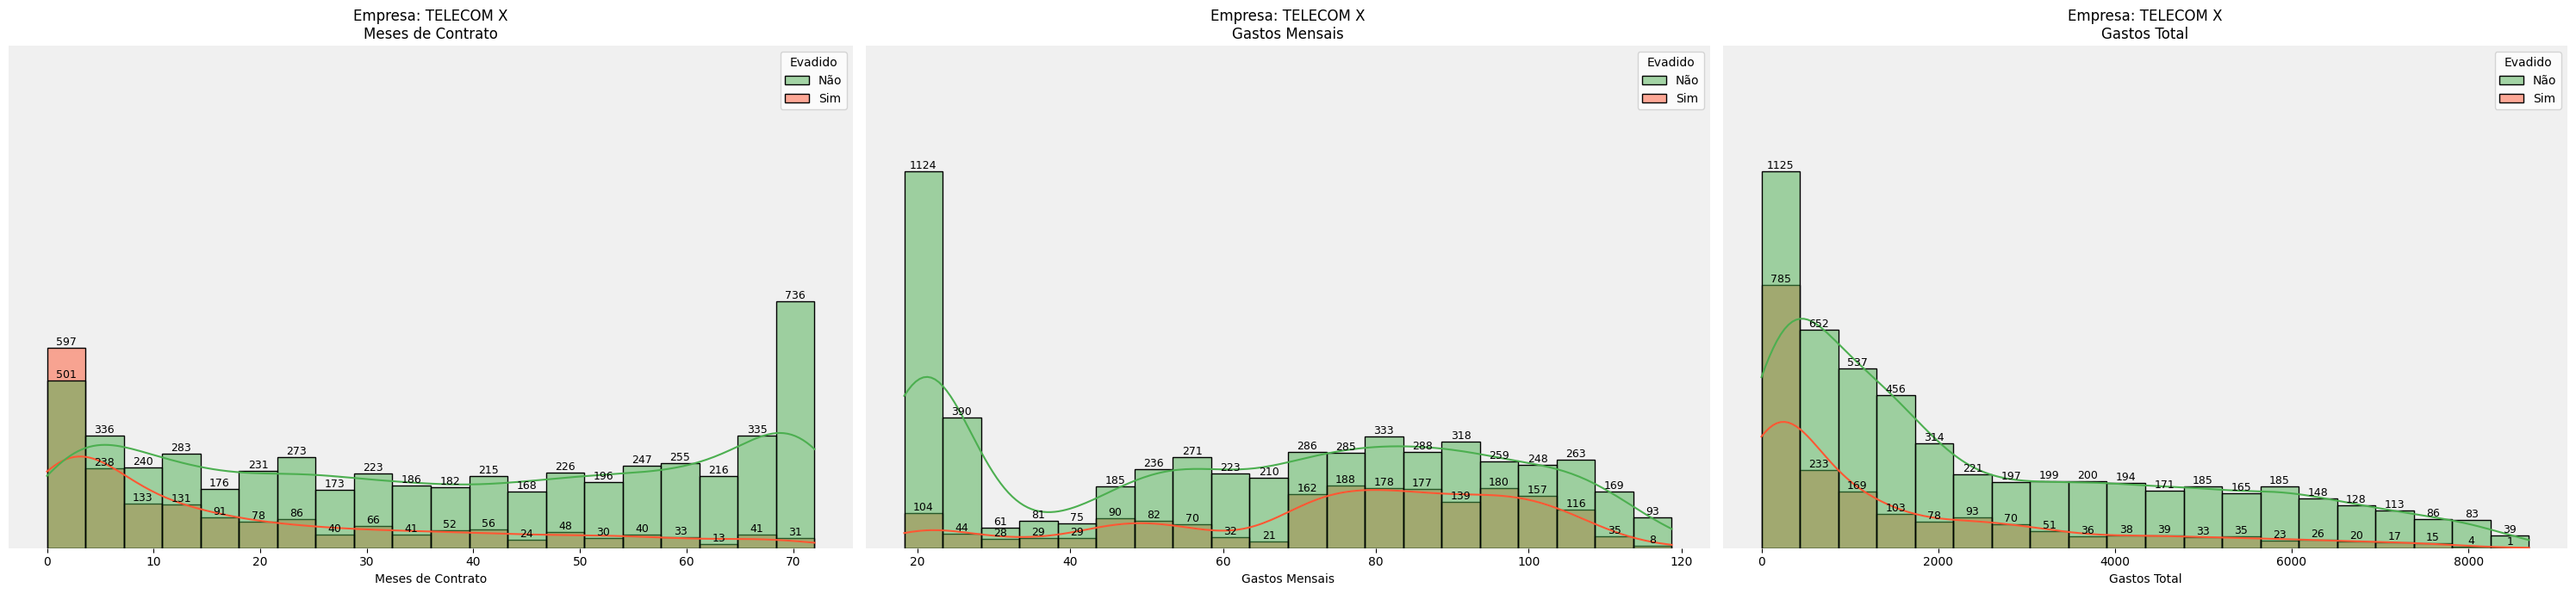

In [407]:
# Colunas para gerar gráficos
column_titles = {
    'customer_tenure': 'Meses de Contrato',
    'account_Charges.Monthly': 'Gastos Mensais',
    'account_Charges.Total': 'Gastos Total'
    }

# Mostrar graficos ordenado por column_titles
categorical_cols = [col for col in column_titles.keys() if col in df_pt.columns]

# Definir o número de linhas e colunas para os subplots
n_rows = 1
n_cols = 3

# Quantidade de Valor unicos para não sobre por no eixo X
max_valores_unico = 4

# Paleta de cores para os histogramas (vermelho e amarelo)
histogram_palette = ['#4CAF50', '#FF5733'] #['#FF0000', '#FFD700']

paleta_cores = ['#4CAF50', '#FF5733']

# Padronizar valor maximo das barras
max_value = 1500

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 7))
axes = axes.flatten() # facilitar a iteração axes[i] em vez de axes[0, 0]

for i, col in enumerate(categorical_cols):
    if i < len(axes): # Garante que não excedemos o número de subplots
        ax = axes[i] # Atribui o eixo atual para facilitar a leitura

        # Definir a cor de fundo do subplot
        ax.set_facecolor('#f0f0f0') # Cinza claro

        # Obter o título personalizado do dicionário
        title = column_titles.get(col, f'Churn por {col}')
        ax.set_title('Empresa: TELECOM X\n'+title, fontsize=12)

        # Para valores unicos superior ao definido
        #if df_pt[col].nunique() > max_valores_unico:
        # Gráficos de Histplot (histograma distribuição de frequência) para as variáveis numéricas
        sns.histplot(data=df_pt, x=col, hue='Churn', ax=ax, palette=histogram_palette, kde=True, bins=20) # com 20 barras

        # Gráficos de Densidade (Density Plot) para as variáveis numéricas
        #sns.kdeplot(data=df_pt, x=col, hue='Churn', fill=True,
        #            ax=ax, palette=paleta_cores, common_norm=False, bw_adjust=0.4 ) # common_norm=False para densidade por grupo

        ax.set_xlabel(column_titles.get(col, f'{col}'), fontsize=10)
        ax.set_ylabel('') # Remove o rótulo do eixo Y
        ax.set_yticks([])  # Remove os valores (ticks) do eixo Y
        # Valor maximo da barra
        ax.set_ylim(0, max_value)

        # Adicionar valores nas barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2.,
                        height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=9, color='black')

        # Define o título da legenda como 'Evadido'
        ax.get_legend().set_title('Evadido')

        # Remover as linhas de borda (spines)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)


# Ocultar quaisquer subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Evitar que textos dos gráficos sobreponha ou saia da área visível da figura
plt.tight_layout()

# Mostrar gráfico
plt.show()

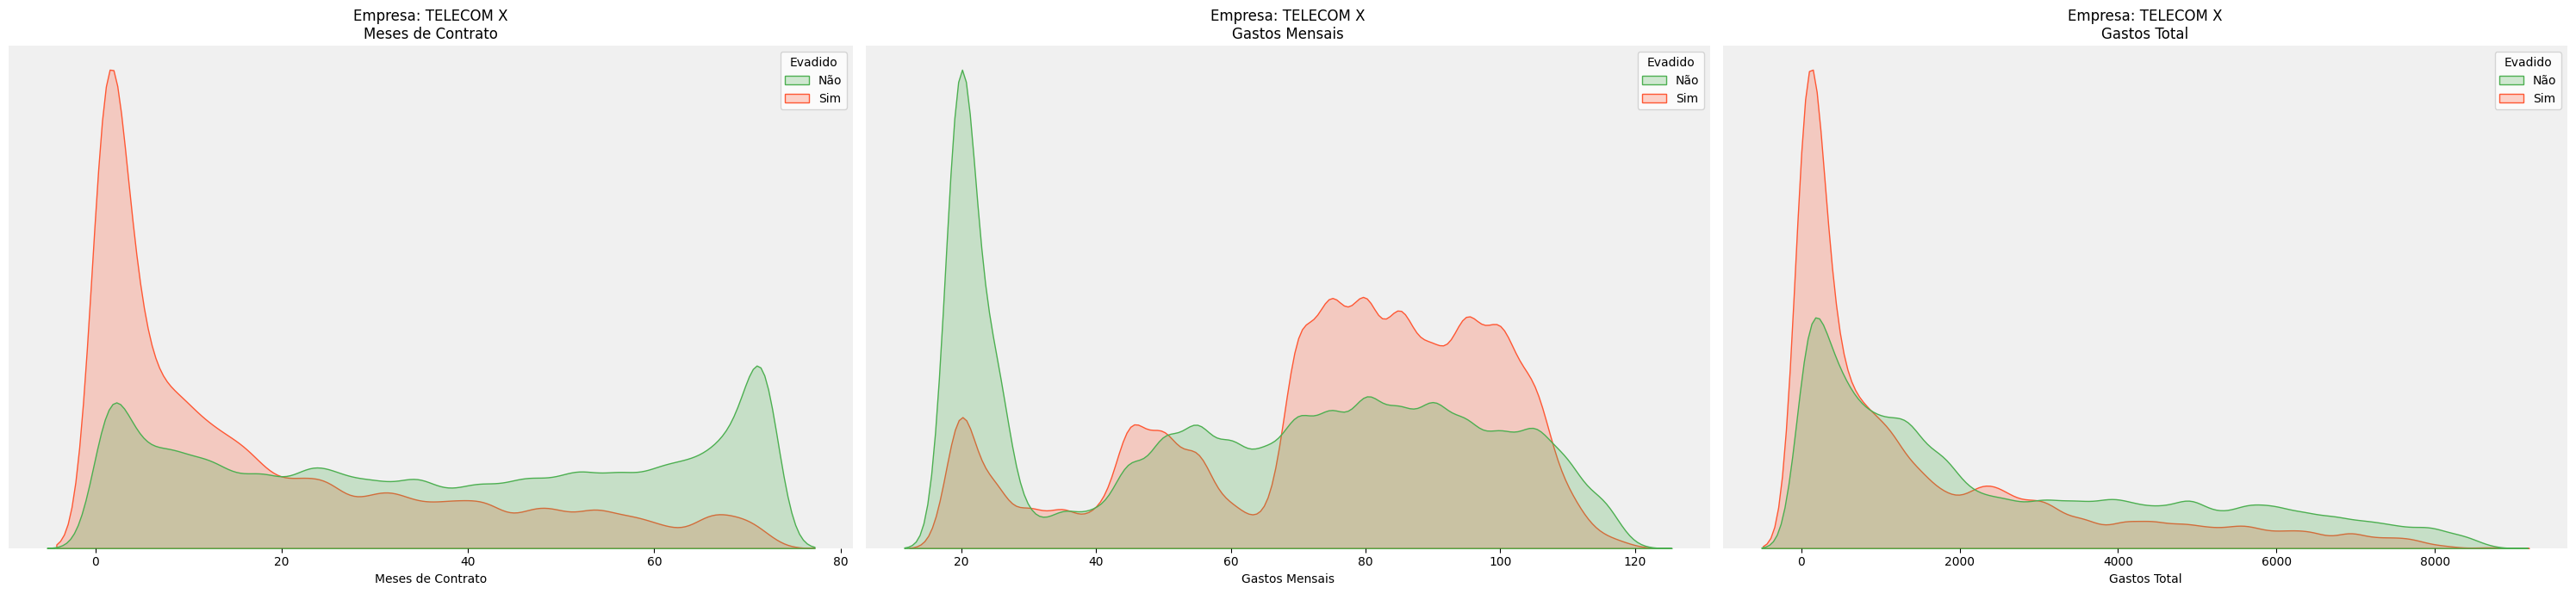

In [408]:
# Colunas para gerar gráficos
column_titles = {
    'customer_tenure': 'Meses de Contrato',
    'account_Charges.Monthly': 'Gastos Mensais',
    'account_Charges.Total': 'Gastos Total'
    }

# Mostrar graficos ordenado por column_titles
categorical_cols = [col for col in column_titles.keys() if col in df_pt.columns]

# Definir o número de linhas e colunas para os subplots
n_rows = 1
n_cols = 3

# Paleta de cores para os histogramas (vermelho e amarelo)
histogram_palette = ['#4CAF50', '#FF5733'] #['#FF0000', '#FFD700']

paleta_cores = ['#4CAF50', '#FF5733']

# Padronizar valor maximo das barras
max_value = 1500

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 7))
axes = axes.flatten() # facilitar a iteração axes[i] em vez de axes[0, 0]

for i, col in enumerate(categorical_cols):
    if i < len(axes): # Garante que não excedemos o número de subplots
        ax = axes[i] # Atribui o eixo atual para facilitar a leitura

        # Definir a cor de fundo do subplot
        ax.set_facecolor('#f0f0f0') # Cinza claro

        # Obter o título personalizado do dicionário
        title = column_titles.get(col, f'Churn por {col}')
        ax.set_title('Empresa: TELECOM X\n'+title, fontsize=12)

        # Gráficos de Densidade (Density Plot) para as variáveis numéricas
        sns.kdeplot(data=df_pt, x=col, hue='Churn', fill=True,
                    ax=ax, palette=paleta_cores, common_norm=False, bw_adjust=0.4 ) # common_norm=False para densidade por grupo

        ax.set_xlabel(column_titles.get(col, f'{col}'), fontsize=10)
        ax.set_ylabel('') # Remove o rótulo do eixo Y
        ax.set_yticks([])  # Remove os valores (ticks) do eixo Y

        # Adicionar valores nas barras
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width() / 2.,
                        height,
                        f'{int(height)}',
                        ha='center', va='bottom', fontsize=9, color='black')

        # Define o título da legenda como 'Evadido'
        ax.get_legend().set_title('Evadido')

        # Remover as linhas de borda (spines)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)


# Ocultar quaisquer subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Evitar que textos dos gráficos sobreponha ou saia da área visível da figura
plt.tight_layout()

# Mostrar gráfico
plt.show()

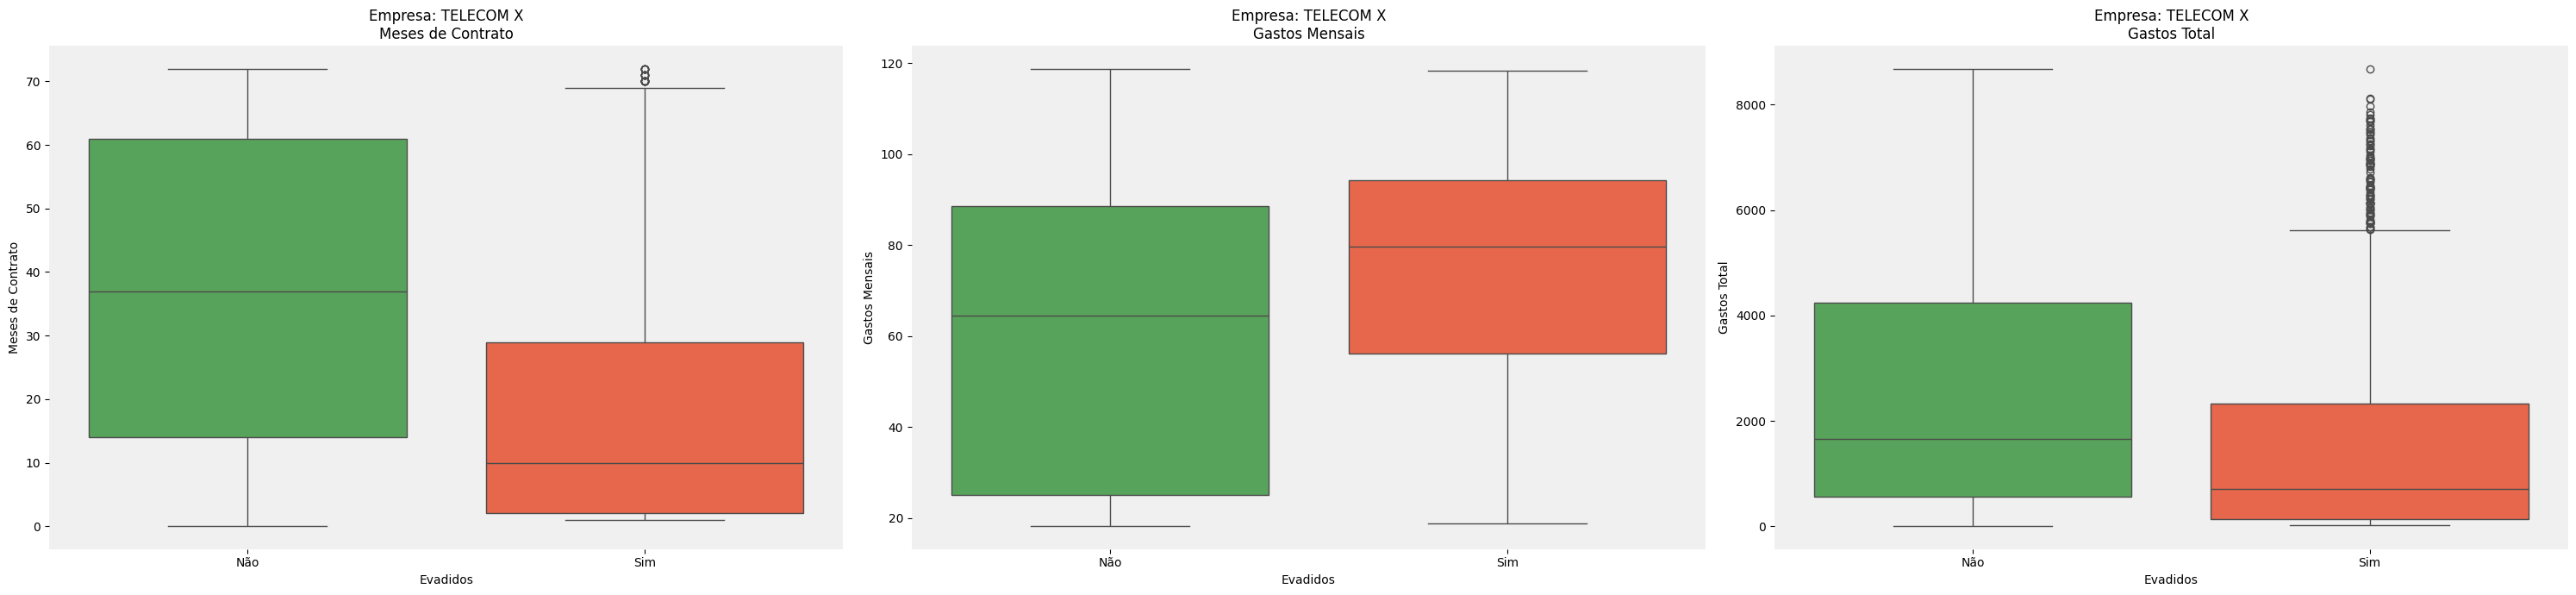

In [409]:
# Colunas para gerar gráficos
column_titles = {
    'customer_tenure': 'Meses de Contrato',
    'account_Charges.Monthly': 'Gastos Mensais',
    'account_Charges.Total': 'Gastos Total'
    }

# Mostrar graficos ordenado por column_titles
categorical_cols = [col for col in column_titles.keys() if col in df_pt.columns]

# Definir o número de linhas e colunas para os subplots
n_rows = 1
n_cols = 3

# Paleta de cores para os histogramas (vermelho e amarelo)
histogram_palette = ['#4CAF50', '#FF5733'] #['#FF0000', '#FFD700']

paleta_cores = ['#4CAF50', '#FF5733']

# Padronizar valor maximo das barras
max_value = 1500

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 10, n_rows * 7))
axes = axes.flatten() # facilitar a iteração axes[i] em vez de axes[0, 0]

for i, col in enumerate(categorical_cols):
    if i < len(axes): # Garante que não excedemos o número de subplots
        ax = axes[i] # Atribui o eixo atual para facilitar a leitura

        # Definir a cor de fundo do subplot
        ax.set_facecolor('#f0f0f0') # Cinza claro

        # Obter o título personalizado do dicionário
        title = column_titles.get(col, f'Churn por {col}')
        ax.set_title('Empresa: TELECOM X\n'+title, fontsize=12)

        # Gráficos de Densidade (Density Plot) para as variáveis numéricas
        sns.boxplot(data=df_pt, x='Churn', y=col, hue='Churn', fill=True,
                    ax=ax, palette=paleta_cores, ) # common_norm=False para densidade por grupo

        ax.set_ylabel(column_titles.get(col, f'{col}'), fontsize=10)
        ax.set_xlabel('Evadidos') # Remove o rótulo do eixo Y
        #ax.set_yticks([])  # Remove os valores (ticks) do eixo Y

        # Remover as linhas de borda (spines)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)


# Ocultar quaisquer subplots vazios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Evitar que textos dos gráficos sobreponha ou saia da área visível da figura
plt.tight_layout()

# Mostrar gráfico
plt.show()

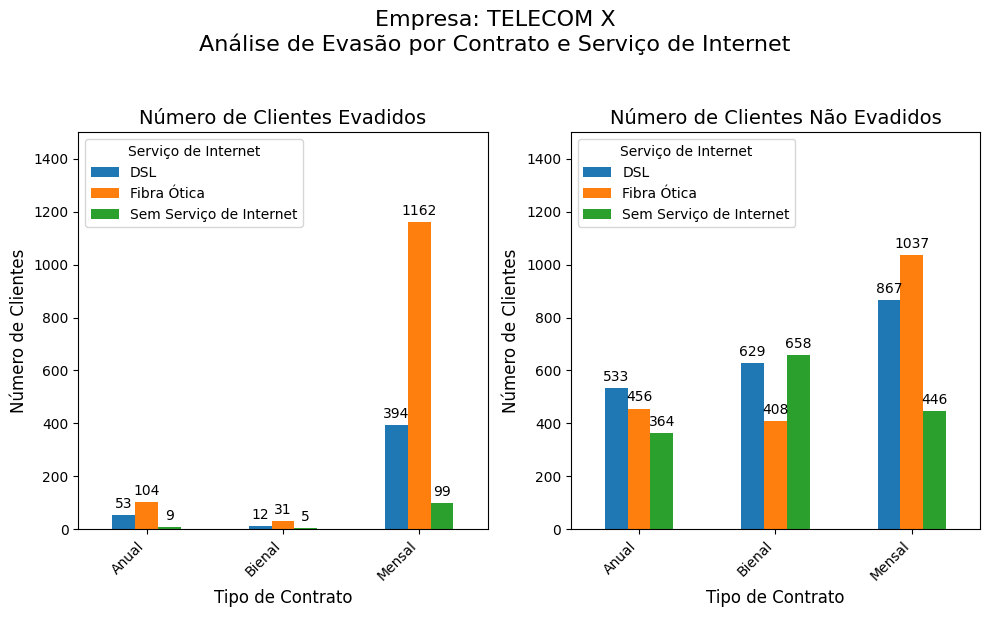

In [410]:
# Filtrar o DataFrame para 'Churn' = 'Sim'
df_churn_sim = df_pt[df_pt['Churn'] == 'Sim']
churn_counts_sim = df_churn_sim.groupby(['account_Contract', 'internet_InternetService']).size().unstack(fill_value=0)

# Filtrar o DataFrame para 'Churn' = 'Nao'
df_churn_nao = df_pt[df_pt['Churn'] == 'Não']
churn_counts_nao = df_churn_nao.groupby(['account_Contract', 'internet_InternetService']).size().unstack(fill_value=0)

# Padronizar valor maximo das barras
max_value = 1500

# Criar a figura e os dois subplots (1 linha, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# --- Gráfico para Churn = Sim (primeiro subplot) ---
ax1 = churn_counts_sim.plot(kind='bar', ax=axes[0])

# Valor maximo da barra
ax1.set_ylim(0, max_value)

# Adicionar os valores nas barras do Churn = Sim
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax1.set_title('Número de Clientes Evadidos', fontsize=14)
ax1.set_xlabel('Tipo de Contrato', fontsize=12)
ax1.set_ylabel('Número de Clientes', fontsize=12)

# Corrigido: Usar tick_params para rotação e set_xticklabels para alinhamento horizontal
ax1.tick_params(axis='x', labelrotation=45)
# Para o horizontal alignment, você pode precisar fazer isso nos rótulos diretamente
plt.setp(ax1.get_xticklabels(), ha='right')
ax1.legend(title='Serviço de Internet', loc='upper left')

# --- Gráfico para Churn = Nao (segundo subplot) ---
ax2 = churn_counts_nao.plot(kind='bar', ax=axes[1])
ax2.set_ylim(0, max_value)
# Adicionar os valores nas barras do Churn = Nao
for container in ax2.containers:
    ax2.bar_label(container, fmt='%d', label_type='edge', padding=3)

ax2.set_title('Número de Clientes Não Evadidos', fontsize=14)
ax2.set_xlabel('Tipo de Contrato', fontsize=12)
ax2.set_ylabel('Número de Clientes', fontsize=12)

# Corrigido: Usar tick_params para rotação e set_xticklabels para alinhamento horizontal
ax2.tick_params(axis='x', labelrotation=45)
# Para o horizontal alignment, você pode precisar fazer isso nos rótulos diretamente
plt.setp(ax2.get_xticklabels(), ha='right')
ax2.legend(title='Serviço de Internet', loc='upper left')

# Título geral para a figura
fig.suptitle('Empresa: TELECOM X\nAnálise de Evasão por Contrato e Serviço de Internet', fontsize=16, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout e o espaço para o suptitle
plt.show()

In [411]:
df_pt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   object 
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

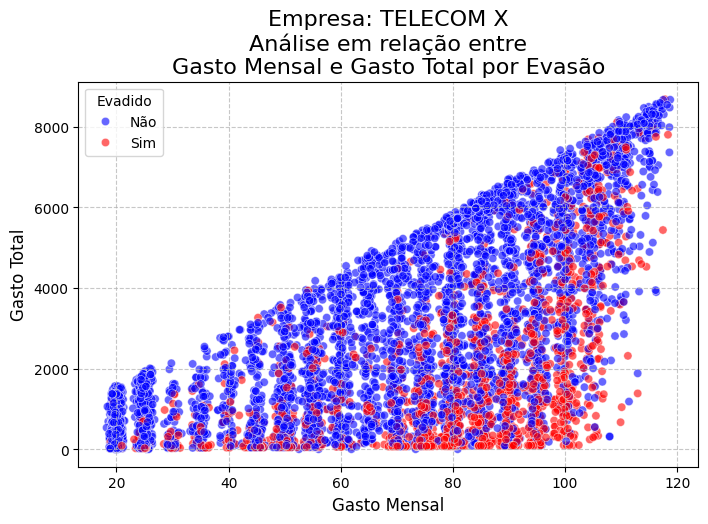

In [412]:
# Gráfico de Dispersão para Gasto Mensal vs Gasto Total com Churn
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_pt,
    x='account_Charges.Monthly',
    y='account_Charges.Total',
    hue='Churn', # Colorir os pontos com base na coluna 'Churn'
    palette={'Sim': 'red', 'Não': 'blue'}, # Cores personalizadas
    alpha=0.6 # Transparência dos pontos
)

plt.title('Empresa: TELECOM X\nAnálise em relação entre\nGasto Mensal e Gasto Total por Evasão', fontsize=16)
plt.xlabel('Gasto Mensal', fontsize=12)
plt.ylabel('Gasto Total', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Evadido', loc='upper left')
plt.show()

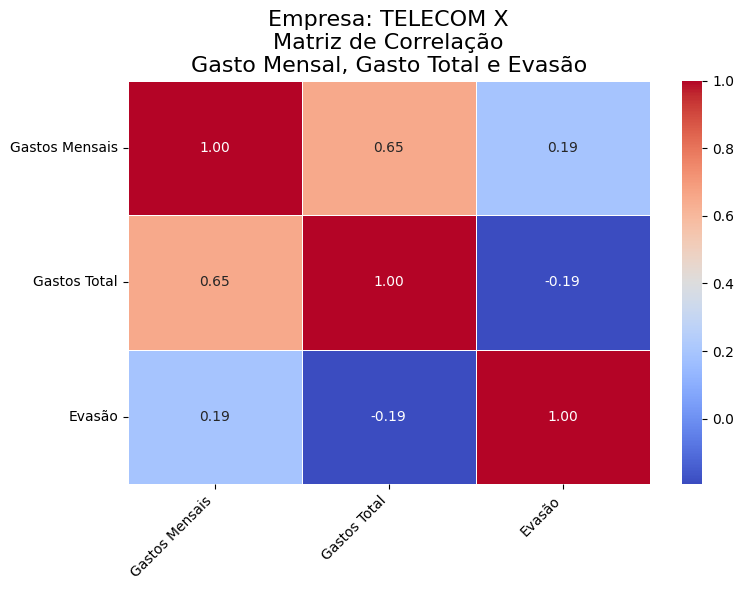

In [413]:
df_pt['Churn_encoded'] = df_pt['Churn'].apply(lambda x: 1 if x == 'Sim' else 0)

# Calcular a matriz de correlação
correlation_matrix = df_pt[['account_Charges.Monthly', 'account_Charges.Total', 'Churn_encoded']].corr()
# Define the custom column titles
column_titles = {
    'customer_tenure': 'Meses de Contrato',
    'account_Charges.Monthly': 'Gastos Mensais',
    'account_Charges.Total': 'Gastos Total',
    'Churn_encoded': 'Evasão' # Add 'Evasão' for the encoded Churn column
}

# Get the original column names from the correlation matrix in order
original_cols_ordered = correlation_matrix.columns.tolist()

# Create a list of the display names in the correct order
display_names = [column_titles.get(col, col) for col in original_cols_ordered]

# Visualize - Heatmap for Correlations
plt.figure(figsize=(8, 6)) # Adjusted figsize slightly for better label visibility
ax = sns.heatmap(
    correlation_matrix,
    annot=True,     # Show correlation values in cells
    cmap='coolwarm', # Color scheme
    fmt=".2f",      # Format numbers (two decimal places)
    linewidths=.5   # Lines between cells
)

plt.title('Empresa: TELECOM X\nMatriz de Correlação\nGasto Mensal, Gasto Total e Evasão', fontsize=16)

# Set custom tick labels for X and Y axes
ax.set_xticklabels(display_names, rotation=45, ha='right')
ax.set_yticklabels(display_names, rotation=0)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [414]:
ValoresUnicos(df_pt)

customerID
 ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
 ['Não' 'Sim']
customer_gender
 ['Feminino' 'Masculino']
customer_SeniorCitizen
 ['Não' 'Sim']
customer_Partner
 ['Sim' 'Não']
customer_Dependents
 ['Sim' 'Não']
customer_tenure
 [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService
 ['Sim' 'Não']
phone_MultipleLines
 ['Não' 'Sim' 'Sem Serviço de Telefone']
internet_InternetService
 ['DSL' 'Fibra Ótica' 'Sem Serviço de Internet']
internet_OnlineSecurity
 ['Não' 'Sim' 'Sem Serviço de Internet']
internet_OnlineBackup
 ['Sim' 'Não' 'Sem Serviço de Internet']
internet_DeviceProtection
 ['Não' 'Sim' 'Sem Serviço de Internet']
internet_TechSupport
 ['Sim' 'Não' 'Sem Serviço de Internet']
internet_StreamingTV
 ['Sim' 'Não' 'Sem Serviço de Internet']
intern

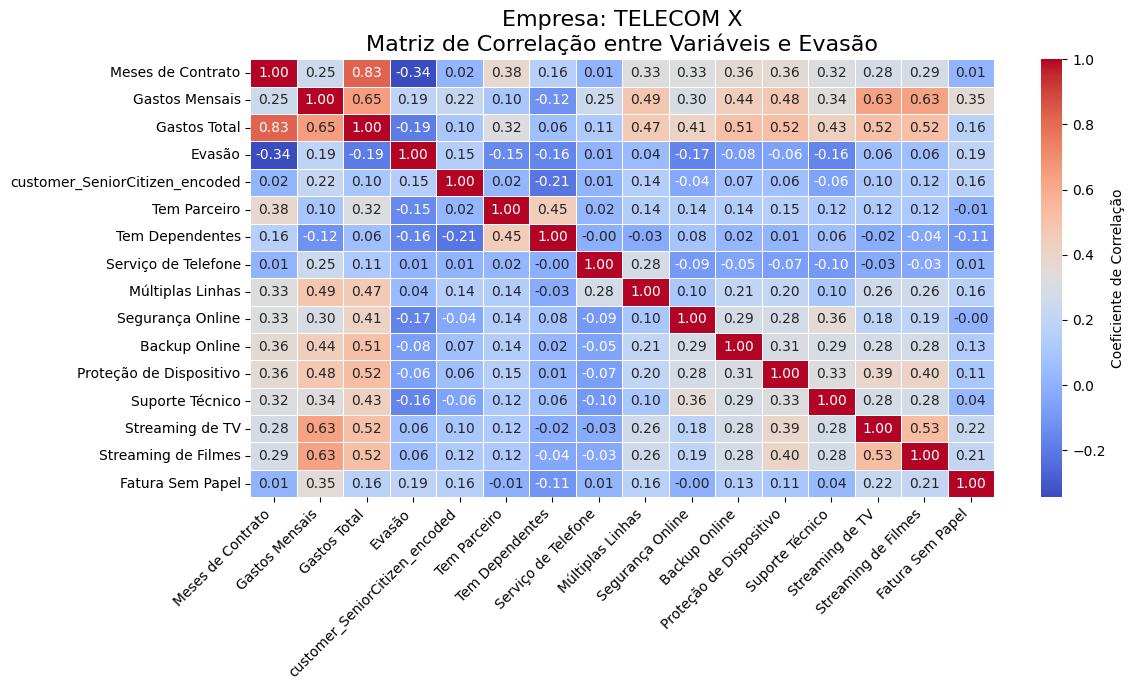

In [415]:
# Codificar 'Churn' para numérico
df_pt['Churn_encoded'] = df_pt['Churn'].apply(lambda x: 1 if x == 'Sim' else 0)

# Variáveis binárias com (Sim/Não) para 1/0
cols_numericas = [
    'customer_SeniorCitizen',
    'customer_Partner',
    'customer_Dependents',
    'phone_PhoneService',
    'phone_MultipleLines',
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies',
    'account_PaperlessBilling'
]

for col in cols_numericas:
    # Mapeia 'Yes' para 1, 'No' para 0. Quaisquer outros valores virarão NaN.
    df_pt[col + '_encoded'] = df_pt[col].map({'Sim': 1, 'Não': 0})
    df_pt[col + '_encoded'] = df_pt[col + '_encoded'].fillna(0).astype(int)
    # Garante que a coluna final seja de um tipo numérico (int ou float)
    df_pt[col + '_encoded'] = df_pt[col + '_encoded'].astype(int)

# --- Selecionar as colunas numéricas e codificadas para a matriz de correlação ---
# **CRÍTICO: Certifique-se de que CADA COLUNA NESTA LISTA é NUMÉRICA.**
# Verifique se você está referenciando as colunas '_encoded' para as variáveis categóricas.
cols_codificadas = [
    'customer_tenure',
    'account_Charges.Monthly',
    'account_Charges.Total',
    'Churn_encoded',
    'customer_SeniorCitizen_encoded',
    'customer_Partner_encoded',
    'customer_Dependents_encoded',
    'phone_PhoneService_encoded',
    'phone_MultipleLines_encoded',
    'internet_OnlineSecurity_encoded',
    'internet_OnlineBackup_encoded',
    'internet_DeviceProtection_encoded',
    'internet_TechSupport_encoded',
    'internet_StreamingTV_encoded',
    'internet_StreamingMovies_encoded',
    'account_PaperlessBilling_encoded'
]

# Filtrar o DataFrame para apenas as colunas selecionadas.
# IMPORTANTE: Se alguma coluna nesta lista não existir no df_pt, ocorrerá um KeyError.
# Se alguma coluna existir, mas não for numérica, ocorrerá o ValueError.
df_for_corr = df_pt[cols_codificadas]

# Calcular a matriz de correlação
correlation_matrix = df_for_corr.corr()

# --- Definição dos nomes para exibição (customização do heatmap) ---
column_titles = {
    'customer_tenure': 'Meses de Contrato',
    'account_Charges.Monthly': 'Gastos Mensais',
    'account_Charges.Total': 'Gastos Total',
    'Churn_encoded': 'Evasão',
    'customer_Partner_encoded': 'Tem Parceiro',
    'customer_Dependents_encoded': 'Tem Dependentes',
    'phone_PhoneService_encoded': 'Serviço de Telefone',
    'phone_MultipleLines_encoded': 'Múltiplas Linhas',
    'internet_InternetService_encoded': 'Serviço de Internet',
    'internet_OnlineSecurity_encoded': 'Segurança Online',
    'internet_OnlineBackup_encoded': 'Backup Online',
    'internet_DeviceProtection_encoded': 'Proteção de Dispositivo',
    'internet_TechSupport_encoded': 'Suporte Técnico',
    'internet_StreamingTV_encoded': 'Streaming de TV',
    'internet_StreamingMovies_encoded': 'Streaming de Filmes',
    'account_PaperlessBilling_encoded': 'Fatura Sem Papel'
}

# Obter a ordem original das colunas na matriz de correlação
original_cols_ordered = correlation_matrix.columns.tolist()

# Criar uma lista dos nomes de exibição na ordem correta
display_names = [column_titles.get(col, col) for col in original_cols_ordered]

# --- Visualizar - Mapa de Calor para Correlações ---
plt.figure(figsize=(12, 7))
ax = sns.heatmap(
    correlation_matrix,
    annot=True,     # Mostrar os valores de correlação nas células
    cmap='coolwarm', # Esquema de cores (coolwarm para indicar direções)
    fmt=".2f",      # Formato dos números (duas casas decimais)
    linewidths=.5,  # Linhas entre as células
    cbar_kws={'label': 'Coeficiente de Correlação'} # Legenda da barra de cores
)

plt.title('Empresa: TELECOM X\nMatriz de Correlação entre Variáveis e Evasão', fontsize=16)

# Definir os rótulos personalizados para os eixos X e Y
ax.set_xticklabels(display_names, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(display_names, rotation=0, fontsize=10)

plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

#📄Relatorio Final